#  ISYS2407 Information Systems Solutions & Design

# Assignment 3

# Model 2

#### Student name: Muhamamd Ali Syed
 
#### Student number: s3640387

# 1 Import libraries 

In [11]:
# Library for pickling
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 


# Load the data 

In [2]:
#Load the pickled file

passengerSatisfaction_df = pd.read_csv('passenger-satisfaction.csv')  

# Check
passengerSatisfaction_df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins),satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# Data Transformations to improve modelling performance
### Should be performed after the data has been split into training and testing sets to prevent information leakage (train-test contamination)
### Scale the columns with continuous values (only the ones you want)
## 3 Split the data into training and testing sets


In [3]:
feature_cols = [
    'age', 
    'flight_distance', 
    'inflight_wifi_service', 
    'convenient_departure_arrival_time',
    'ease_of_online_booking', 
    'gate_location', 
    'food_and_drink', 
    'online_boarding',
    'seat_comfort',
    'inflight_entertainment',
    'onboard_service',
    'leg_room_service',
    'baggage_handling',
    'checkin_service'
    
]

X = passengerSatisfaction_df[feature_cols]
# print('X:\n', X)

# Store the labels/target in variable y (lower case as its a single value)
y = passengerSatisfaction_df['gender']
# print('y:\n', y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, # keep 30% for testing
                                                    random_state=2) 

In [4]:
print(X_train.shape)
print(X_train)


(72732, 14)
        age  flight_distance  inflight_wifi_service  \
58712    24              283                      3   
78436    22             1598                      2   
71500    52             3965                      3   
68106    30             2865                      1   
25689    40              368                      3   
...     ...              ...                    ...   
44566    36              738                      2   
95816    47              406                      2   
72173    51             1120                      3   
100879   58              235                      2   
89256    21              447                      4   

        convenient_departure_arrival_time  ease_of_online_booking  \
58712                                   0                       3   
78436                                   1                       2   
71500                                   4                       2   
68106                                   1          

In [5]:

print(X_test.shape)
print(X_test)

(31172, 14)
        age  flight_distance  inflight_wifi_service  \
18981    49             3417                      4   
4555     19              328                      2   
44022    52              667                      1   
84411    65              997                      4   
91989    31              403                      3   
...     ...              ...                    ...   
2620     50             3477                      5   
21396    44              846                      3   
94078    41             3369                      2   
10550    30              484                      2   
101352   48             1616                      2   

        convenient_departure_arrival_time  ease_of_online_booking  \
18981                                   4                       2   
4555                                    0                       2   
44022                                   4                       1   
84411                                   5          

# Random Forest classifier 

In [6]:
# Import the model library
from sklearn.ensemble import RandomForestClassifier

# Instantiate model and fit on training data
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Predict using test data
y_pred = rf_model.predict(X_test)

# Quick check
print(y_pred[:5])


['Male' 'Male' 'Male' 'Female' 'Female']


# Confusion Matrix and accuracy

In [7]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred, ["Male", "Female"])
import numpy as np
import math
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
print(con_mat)
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy)
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

C:\Users\Naveed\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Male', 'Female'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[8496 6834]
 [5889 9953]]
Total accuracy: 0.59185
Class1 accuracy: 0.55421
Class2 accuracy: 0.62827
Geometric mean accuracy: 0.59008


## plot confusion matrix 

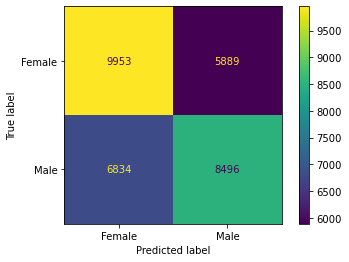

In [8]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, X_test, y_test)

# Data Transformations to improve modelling performance
### Should be performed after the data has been split into training and testing sets to prevent information leakage (train-test contamination)
# One-hot encoding of columns with multiple categories

##### Note: Since one-hot encoding generates lots of dummy variables (columns), this has an impact on certain machine learning algorithms - only use when justified (need to experiment to find out)

In [20]:
# 1. Select the columns to one-hot encode
# Make sure the columns are categorical columns with multiple labels 
# It does not matter whether the labels are words or numbers
# Better list all the columns and comment out the ones you don't need
columns_to_onehot_encode = [
    'inflight_wifi_service', 
    'convenient_departure_arrival_time',
    'ease_of_online_booking', 
    'gate_location', 
    'food_and_drink', 
    'online_boarding',
    'seat_comfort',
    'inflight_entertainment',
    'onboard_service',
    'leg_room_service',
    'baggage_handling',
    'checkin_service'
]

# 2 Instantiate a one-hot encoder
#enc = OneHotEncoder() # No, this will generate strings, not numbers
enc = LabelBinarizer()

# 3. Fit the encoder on the training column and transform the training and testing columns
# Use a loop to label encode all the required columns 
for col in columns_to_onehot_encode:
    # Option 1. Using pandas (simpler than sklearn)
    ## Fix X_train
#     dummies_df = pd.get_dummies(X_train[col], prefix="bpc") # generate dataframe of dummies
#     X_train.drop([col], axis=1, inplace=True) # drop original column
#     X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
#     ## Fix X_test
#     dummies_df = pd.get_dummies(X_test[col], prefix="bpc")
#     X_test.drop([col], axis=1, inplace=True)
#     X_test = pd.concat([X_test, dummies_df], axis=1)
    
    # Option 2: Using sklearn    
#     First fit the encoder to the training data
    enc.fit(X_train[col].values.reshape(-1, 1)) # need to reshape
    X_train_array = enc.transform(X_train[col])
    X_test_array = enc.transform(X_test[col])
    print(X_train_array)
    print(X_train_array)
    # numpy arrays generated - have no column names and don't know the order the codes were generated
    # need to write complex code to generate column names for variable number of columns
    # to be able to convert the numpy array to a daframe
    # Better use the pandas solution!
     
# Check
print("Check Head")
X_train.head()

[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 ...
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 ...
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]
[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 ...
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 ...
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 ...
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 ...
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 ...
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 ...
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]
[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 

,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,...,bpc_72,bpc_73,bpc_74,bpc_75,bpc_76,bpc_77,bpc_78,bpc_79,bpc_80,bpc_85
58712,283,3,0,3,4,1,3,1,1,3,...,0,0,0,0,0,0,0,0,0,0
78436,1598,2,1,2,4,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
71500,3965,3,4,2,4,5,2,3,3,3,...,0,0,0,0,0,0,0,0,0,0
68106,2865,1,1,1,1,4,4,4,4,5,...,0,0,0,0,0,0,0,0,0,0
25689,368,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
